In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple
from IPython.display import Audio
from scipy.io.wavfile import read

from speedypanther.analysis.fourier import fourier_analysis, dft
from speedypanther.shared.helper import normalize
from speedypanther.shared.plot import plot_frequencies, plot_waveform
from speedypanther.synthesis.wave_generation import sample_complex_wave, generate_timesteps

%matplotlib inline

## Fourier Analysis

In [2]:
# Create a new complex wave to play around with.
_, complex_wave = sample_complex_wave(frequencies=[600, 800, 1000, 1600], coeffs=[0.3, 0.2, 0.4, 0.1], end_time=0.1)

duration = 0.005
sample_rate = 44_100
# Take a window of samples out of the complex wave.
sample_window = complex_wave[:int(duration * sample_rate)]

# Turn the time representation of the wave into a frequency representation.
freq_bins, freq_ampls = fourier_analysis(sample_window, duration, sample_rate)

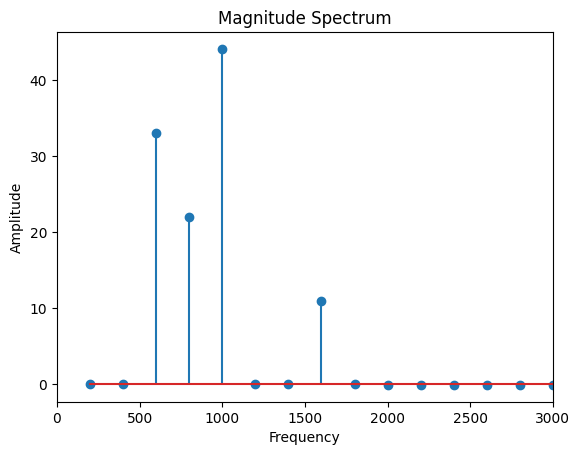

In [3]:
plot_frequencies(freq_bins, freq_ampls, plot_line=False, freq_range=(0, 3000))

## Use the FFT function from numpy to generate frequency bins

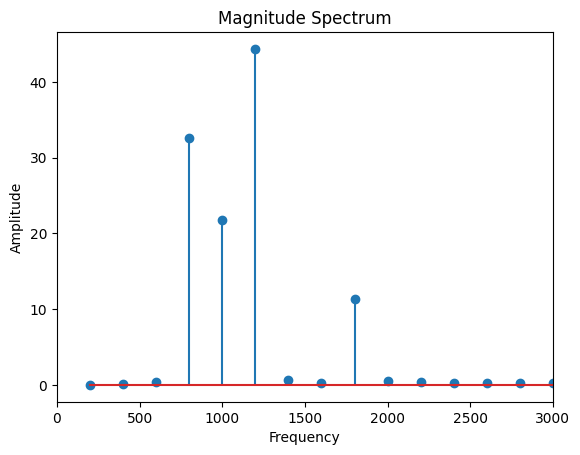

In [4]:
nyquist_threshold = freq_bins.shape[0]
fft_freq_ampls = np.fft.fft(sample_window)
# Since the FFT function even outputs bins above the Nyquist frequency, we can cut it off there.
plot_frequencies(freq_bins, np.abs(fft_freq_ampls[:nyquist_threshold]), plot_line=False, freq_range=(0, 3000))

## Read a real soundfile 

In [5]:
coo_file = "../data/single_words/vowels/Monophthongs/11-coo.wav"
coo_sr, coo = read(coo_file)
coo_arr = np.array(coo, dtype=float)

# Only take the first channel for now.
coo_arr = coo_arr[:, 0]

# Generate timesteps to be able to plot the wave.
coo_timesteps = generate_timesteps(coo_arr)

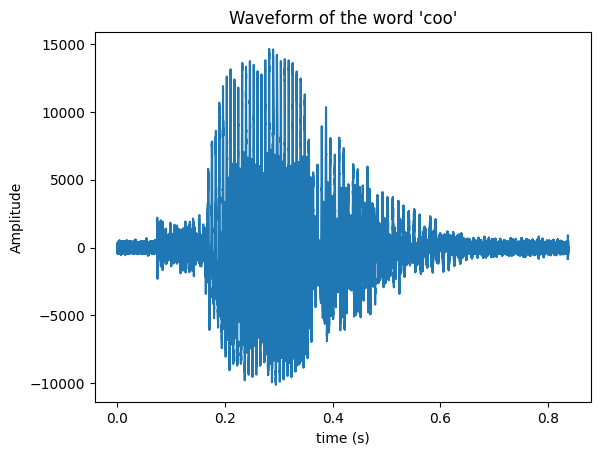

In [6]:
plot_waveform(coo_timesteps, coo_arr, title="Waveform of the word 'coo'")

## Plot Frequency Representations for short analysis windows produced with Fourier Analysis

In [7]:
# Take the first window of x milliseconds and apply Fourier Analysis to it.
audio_length = coo_arr.shape[0] / sample_rate

# Window length in milliseconds.
window_duration = 0.005
samples_per_window = sample_rate * window_duration
# Take the int of the sample_per_window so that it is a full number.
first_window = coo_arr[:int(samples_per_window)]

In [27]:
int(sample_rate * window_duration)

220

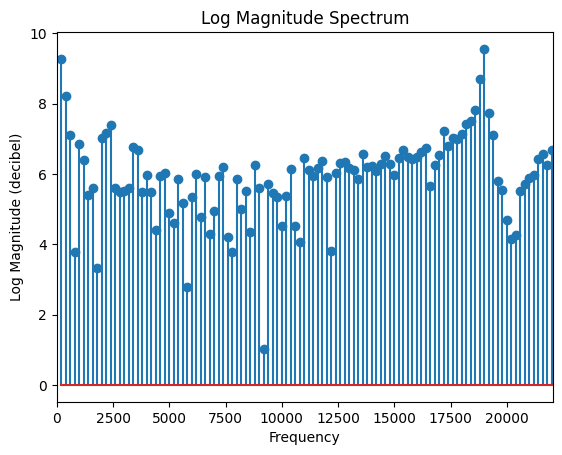

In [8]:
# Calculate the frequency strengths using Fourier Analysis
first_freq_bins, first_freq_ampls = fourier_analysis(first_window, duration=window_duration)
plot_frequencies(first_freq_bins, np.abs(first_freq_ampls), freq_range=(0, sample_rate / 2), log=True)

## Use the FFT function from numpy to generate frequency bins for the real sound

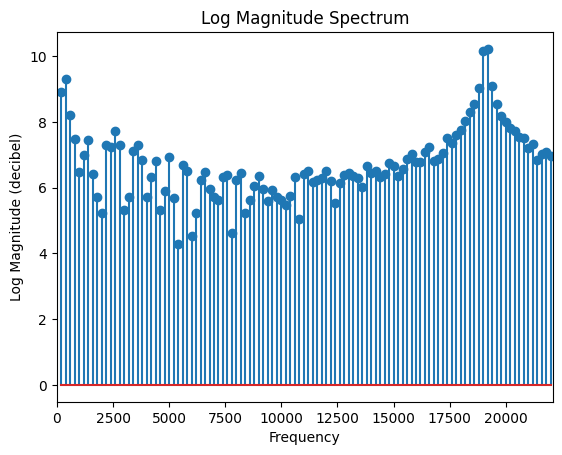

In [9]:
fft_first_freq_ampls = np.fft.fft(first_window)
# Since the FFT function even outputs bins above the Nyquist frequency, we can cut it off there.
plot_frequencies(first_freq_bins, np.abs(fft_first_freq_ampls[:nyquist_threshold]), plot_line=False, log=True)

## Use the Fourier Transform to generate frequency bins for the real /u/ sound

In [10]:
# Plot for a window that is inside the /u/ sound.
start = 40 * samples_per_window
end = start + samples_per_window
u_window = coo_arr[start:end]

u_freq_bins, u_freq_ampls = fourier_analysis(u_window, duration=window_duration)

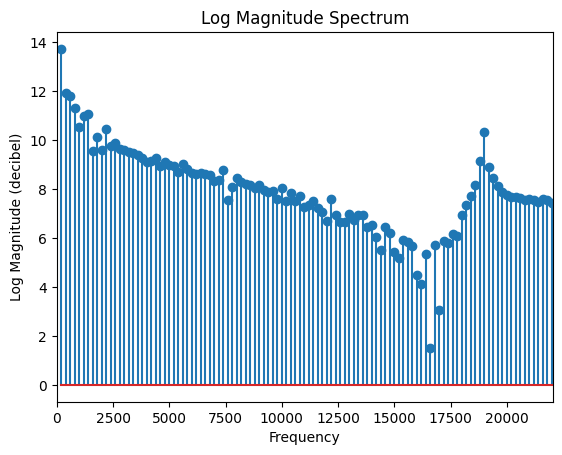

In [11]:
plt.xlim(0, 10000)
# norm_u_ampls = normalize(u_freq_ampls)
plot_frequencies(u_freq_bins, np.abs(u_freq_ampls), freq_range=(0, sample_rate / 2), log=True)

## Use the FFT function from numpy to generate frequency bins for the real /u/ sound

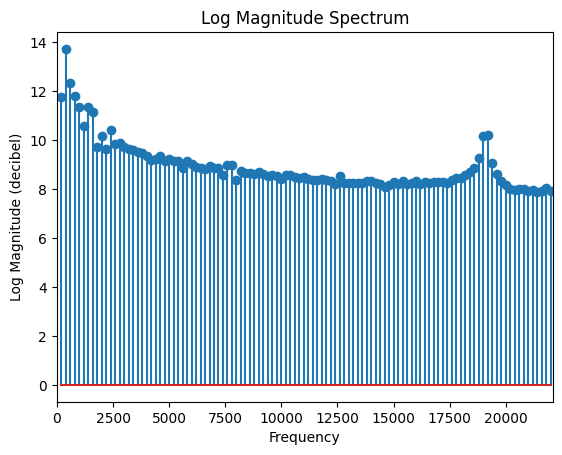

In [12]:
fft_u_freq_ampls = np.fft.fft(u_window)
# Since the FFT function even outputs bins above the Nyquist frequency, we can cut it off there.
plot_frequencies(u_freq_bins, np.abs(fft_u_freq_ampls[:nyquist_threshold]), log=True)

## Use the custom DFT function to generate frequency bins for the real /u/ sound

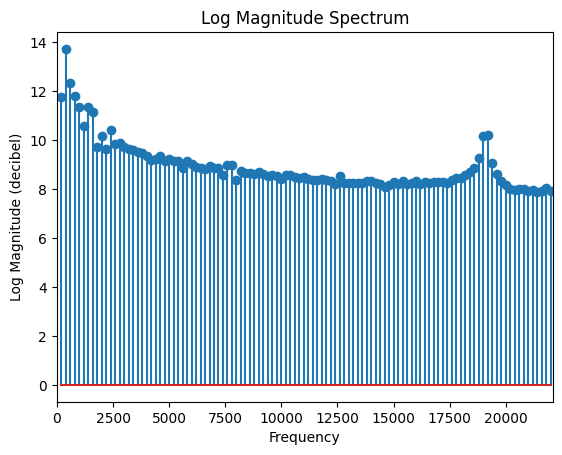

In [13]:
dft_u_freq_ampls = dft(u_window)
plot_frequencies(u_freq_bins, np.abs(dft_u_freq_ampls[:nyquist_threshold]), log=True)

## Take a window from the sound that tends more towards the end of the /u/ sound

In [14]:
# Plot for a window that is at the end of the /u/ sound.
start = 80 * samples_per_window
end = start + samples_per_window
u_end_window = coo_arr[start:end]

u_end_freq_bins, u_end_freq_ampls = fourier_analysis(u_window, duration=window_duration)

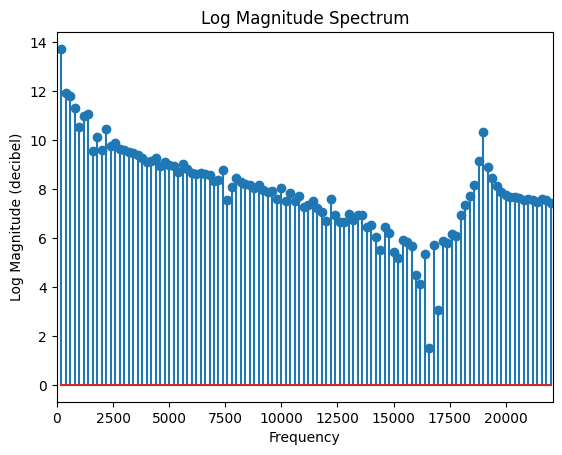

In [15]:
dft_u_end_freq_ampls = dft(u_window)
plot_frequencies(u_end_freq_bins, np.abs(u_end_freq_ampls[:nyquist_threshold]), log=True)

## A longer window containing the whole /u/ sound

In [47]:
# Take a window from 0.2s to 0.4s
start = int(40 * samples_per_window)
end = int(start + 40 * samples_per_window)

whole_u_window = coo_arr[start:end]

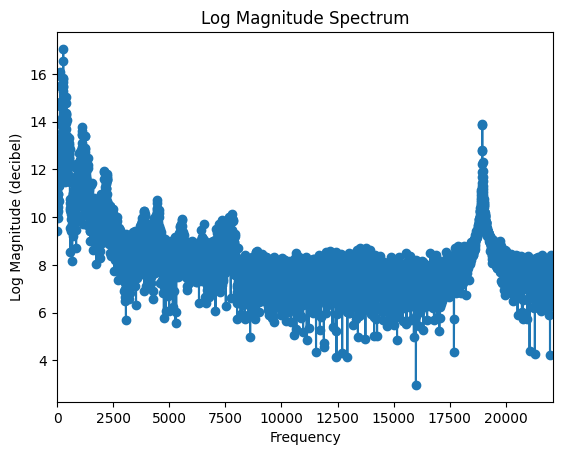

In [62]:
dft_whole_u_freq_ampls = dft(whole_u_window)
custom_threshold = int(dft_whole_u_freq_ampls.shape[0] / 2)
dft_whole_u_freq_ampls = dft_whole_u_freq_ampls[:custom_threshold]

whole_u_freq_bins = np.arange(0, sample_rate / 2, 5)

plot_frequencies(whole_u_freq_bins, np.abs(dft_whole_u_freq_ampls), plot_line=True, log=True)

## Plot only the low frequency regions to inspect first and second formants

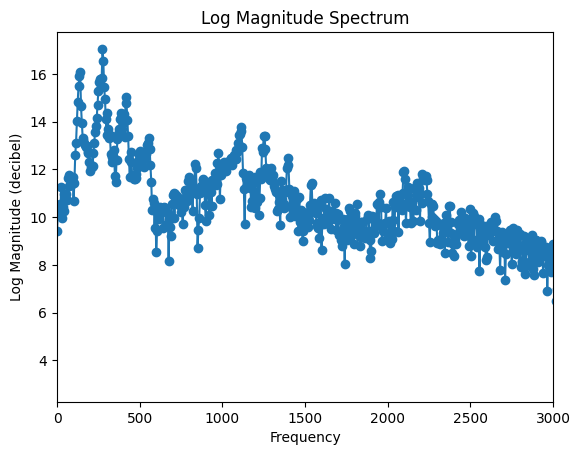

In [64]:
plot_frequencies(whole_u_freq_bins, np.abs(dft_whole_u_freq_ampls), freq_range=(0, 3000), plot_line=True, log=True)

## Plot the formants for an /i:/ sound for comparison

In [65]:
key_file = "../data/single_words/vowels/Monophthongs/8-key.wav"
key_sr, key = read(key_file)
key_arr = np.array(key, dtype=float)

# Only take the first channel for now.
key_arr = key_arr[:, 0]

# Generate timesteps to be able to plot the wave.
key_timesteps = generate_timesteps(key_arr)

In [69]:
# Take a window from 0.2s to 0.4s
start = int(36 * samples_per_window)
end = int(start + 40 * samples_per_window)

i_window = key_arr[start:end]

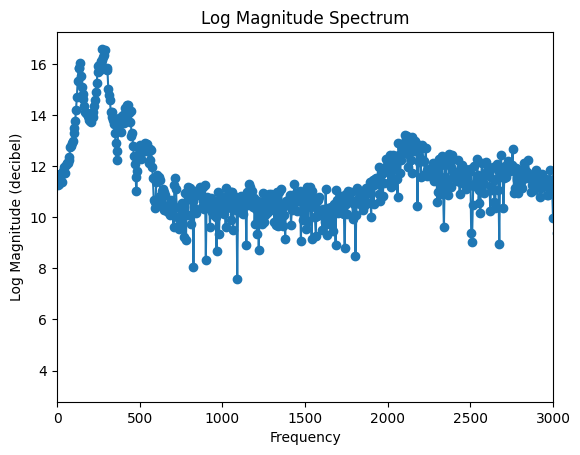

In [71]:
dft_i_freq_ampls = dft(i_window)
custom_threshold = int(dft_i_freq_ampls.shape[0] / 2)
dft_i_freq_ampls = dft_i_freq_ampls[:custom_threshold]

# For an analysis window of 0.2 seconds, the smallest analyzable freqency is 5.
min_freq = 5
i_freq_bins = np.arange(0, sample_rate / 2, min_freq)

plot_frequencies(i_freq_bins, np.abs(dft_i_freq_ampls), freq_range=(0, 3000), plot_line=True, log=True)

It is visible that the first and second formants for the /u/ sound are around 200 and 1000.
For the /i/ sound, they are around 200 and 2000.

This is in line with phonetic theory on vowel formants.

## Play audios to inspect the analyzed sounds

In [20]:
print("A single frame from the /u/ sound.")
Audio(u_freq_ampls, rate=sample_rate)

A single frame from the /u/ sound.


In [72]:
print("A longer window (40 * window_size) from the /u/ sound.")
Audio(whole_u_window, rate=sample_rate)

A longer window (40 * window_size) from the /u/ sound.


In [74]:
print("A longer window (40 * window_size) from the /i/ sound.")
Audio(i_window, rate=sample_rate)

A longer window (40 * window_size) from the /i/ sound.
